In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [2]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Part 1 cleaning

<span style=" font-family:Times New Roman; font-size:2em;"> See if there are NULL values.<span>

In [5]:
real.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<span style=" font-family:Times New Roman; font-size:2em;"> No NULL values in real news.<span>

In [6]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

<span style=" font-family:Times New Roman; font-size:2em;"> No NULL values in fake news.<span>

In [7]:
real.apply(lambda x: x.astype(str).str.lower())
fake.apply(lambda x: x.astype(str).str.lower())

,title,text,subject,date
0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,news,"december 31, 2017"
1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,news,"december 31, 2017"
2,sheriff david clarke becomes an internet joke...,"on friday, it was revealed that former milwauk...",news,"december 30, 2017"
3,trump is so obsessed he even has obama’s name...,"on christmas day, donald trump announced that ...",news,"december 29, 2017"
4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,news,"december 25, 2017"
...,...,...,...,...
23476,mcpain: john mccain furious that iran treated ...,21st century wire says as 21wire reported earl...,middle-east,"january 16, 2016"
23477,justice? yahoo settles e-mail privacy class-ac...,21st century wire says it s a familiar theme. ...,middle-east,"january 16, 2016"
23478,sunnistan: us and allied ‘safe zone’ plan to t...,patrick henningsen 21st century wireremember ...,middle-east,"january 15, 2016"
23479,how to blow $700 million: al jazeera america f...,21st century wire says al jazeera america will...,middle-east,"january 14, 2016"


<span style=" font-family:Times New Roman; font-size:2em;"> Remove duplicates.<span>

In [8]:
real.drop_duplicates(inplace=True)
fake.drop_duplicates(inplace=True)

<span style=" font-family:Times New Roman; font-size:2em;"> Remove panctuations from dataframe.<span>

In [9]:
real['title'] = real['title'].str.replace('[^\w\s]','')
real['text'] = real['text'].str.replace('[^\w\s]','')
real['subject'] = real['subject'].str.replace('[^\w\s]','')
real['date'] = real['date'].str.replace('[^\w\s]','')

fake['title'] = fake['title'].str.replace('[^\w\s]','')
fake['text'] = fake['text'].str.replace('[^\w\s]','')
fake['subject'] = fake['subject'].str.replace('[^\w\s]','')
fake['date'] = fake['date'].str.replace('[^\w\s]','')

# Part 2 Study

## a) titles

In [10]:
from wordcloud import WordCloud, STOPWORDS

<span style=" font-family:Times New Roman; font-size:2em;"> Create word clouds to visualise titles.<span>

<span style=" font-family:Times New Roman; font-size:2em;"> WordCloud of titles for only real news.<span>

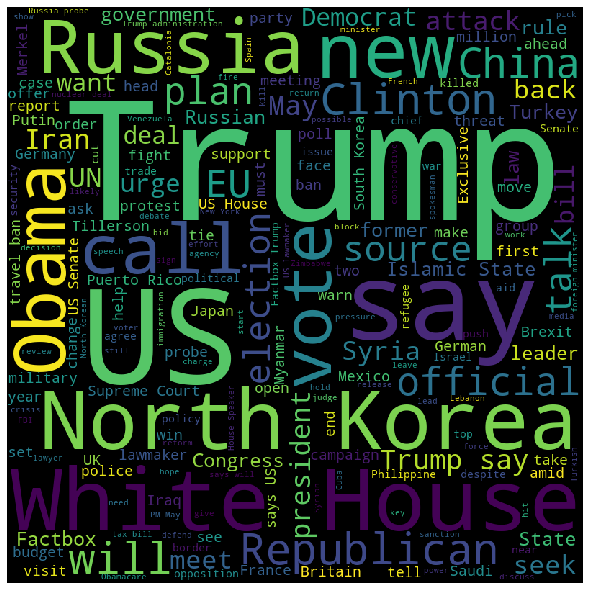

In [11]:
textTxt = ' '.join(real['title'].values)

wordcloudTxt = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(textTxt)
  
                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloudTxt)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

<span style=" font-family:Times New Roman; font-size:2em;"> WordCloud of titles for only fake news.<span>

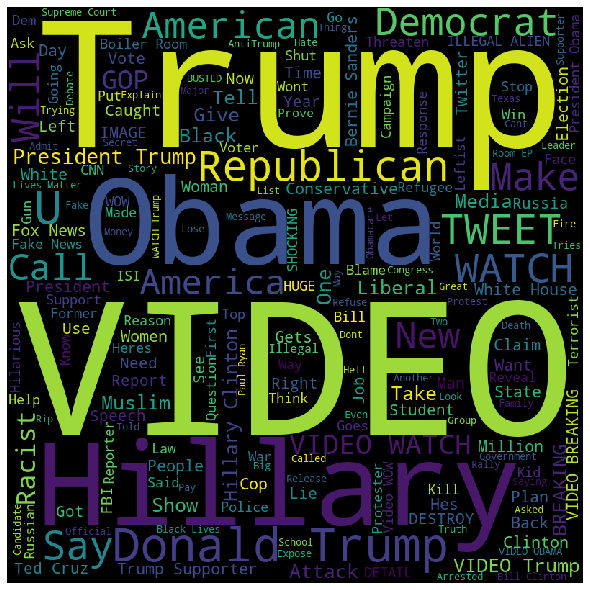

In [12]:
textTxt = ' '.join(fake['title'].values)

wordcloudTxt = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(textTxt)
  
                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloudTxt)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## b) average characters

In [13]:
def average_characters_plot(df, flag):
    temp = np.single([np.arange(len(df))]).T
    temp.fill(0)
    
    if flag:
        for i in range(0,len(df)):
            temp[i] = len(df['text'].values[i]) + len(df['title'].values[i]) + len(df['subject'].values[i])
    else:
        for i in range(0,len(df)):
            temp[i] = len(df.values[i])
    
    sns.set(rc={'figure.figsize':(20,10)})
    
    ax = sns.distplot(temp,bins=200)
    ax.set(xlabel='number of characters')
    
    if flag:
        print("Average characters :")
        print(df['text'].str.len().mean() + df['title'].str.len().mean() + df['subject'].str.len().mean())
    else:
        print("Average characters :")
        print(df.str.len().mean())
    
    plt.show()

Average characters :
2392.6863891377116


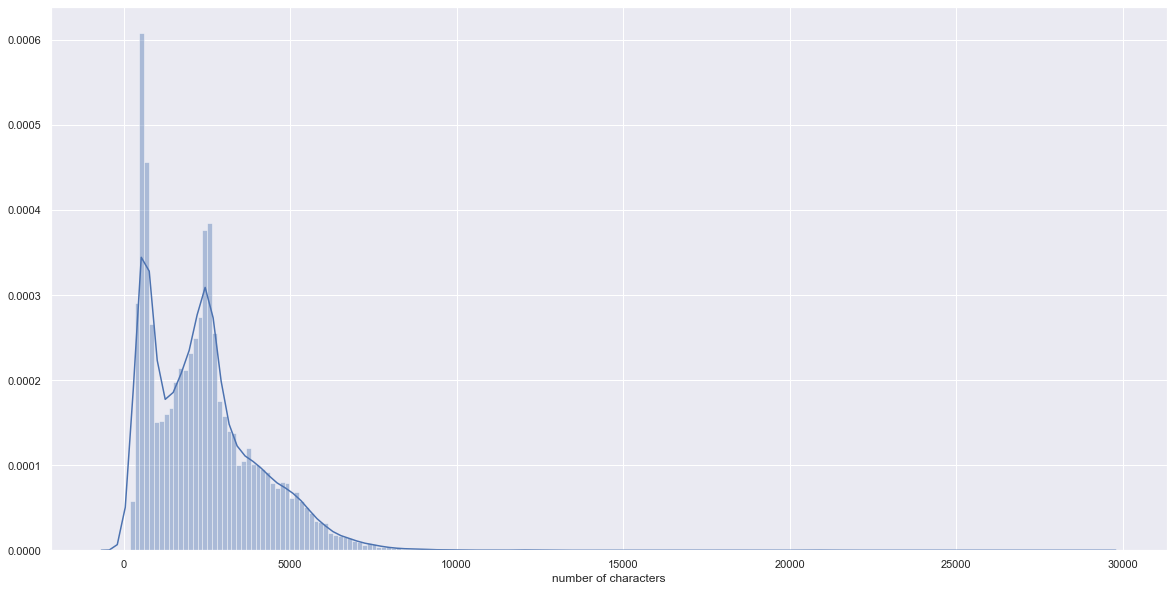

In [14]:
average_characters_plot(real, 1)

Average characters :
2586.3924099156657


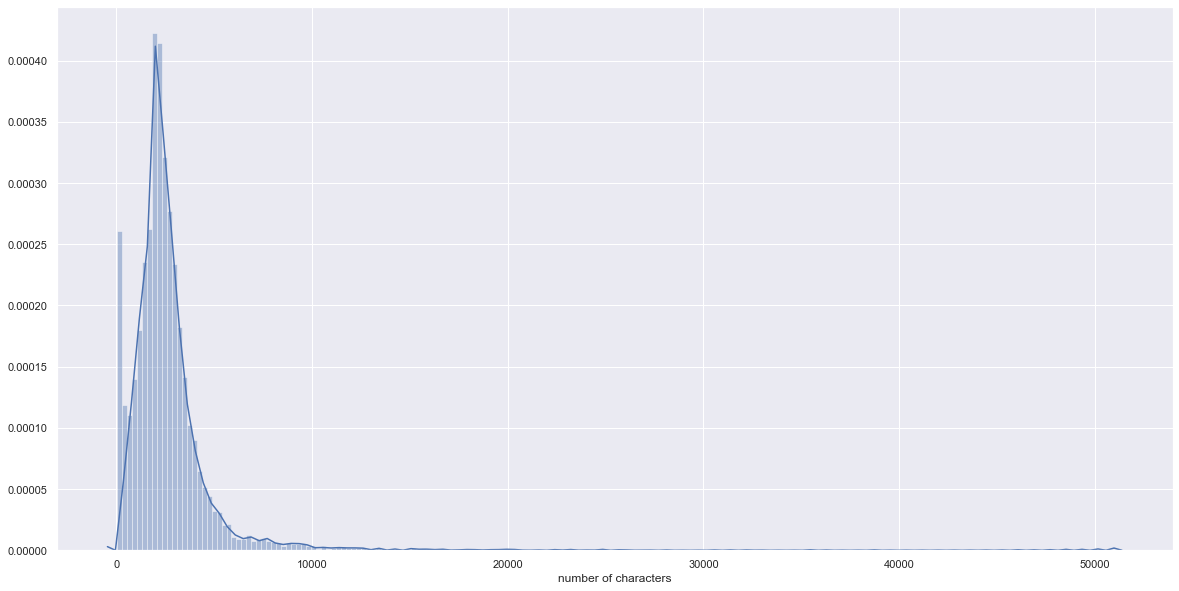

In [15]:
average_characters_plot(fake, 1)

Average characters :
2319.0297958606384


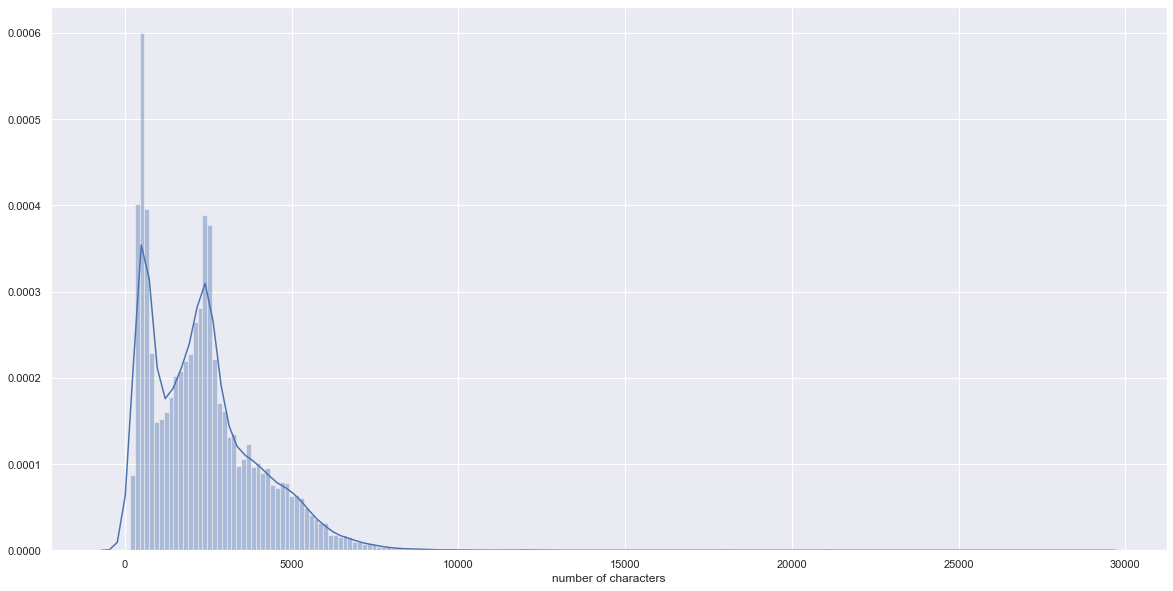

In [16]:
average_characters_plot(real['text'], 0)

Average characters :
2488.6196013289036


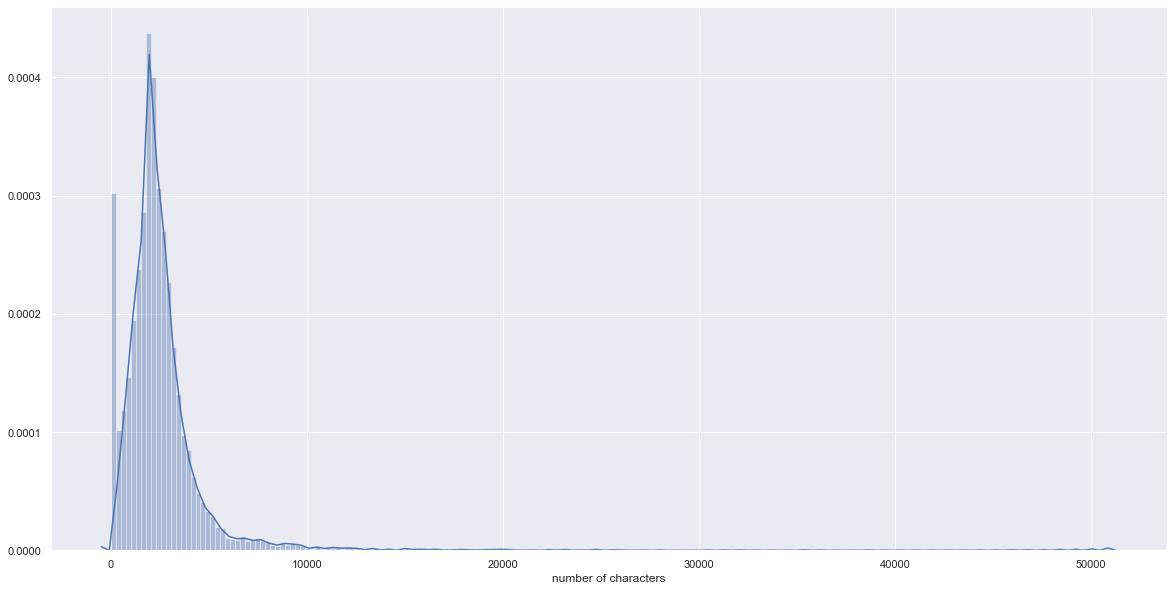

In [17]:
average_characters_plot(fake['text'], 0)

## b) average words

In [18]:
def average_word_plot(df, size):
    temp = np.single([np.arange(len(df))]).T
    temp.fill(0)
    
    df = df.apply(lambda x: len(str(x).split(' ')))
    
    for i in range(0,len(df)):
        temp[i] = df.values[i]
    
    sns.set(rc={'figure.figsize':(20,10)})
    
    ax = sns.distplot(temp,bins=size)
    ax.set(xlabel='number of words')
    

    print("Average words :")
    print(df.mean())
    
    plt.show()

Average words :
393.48573853189384


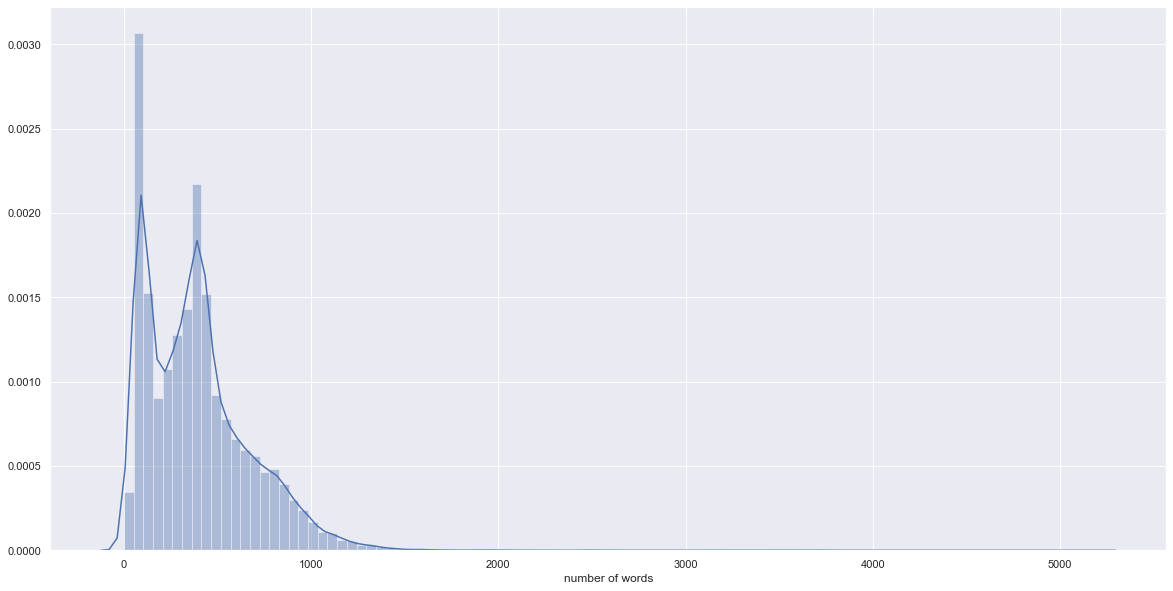

In [19]:
average_word_plot(real['text'], 100)

Average words :
435.26360848453874


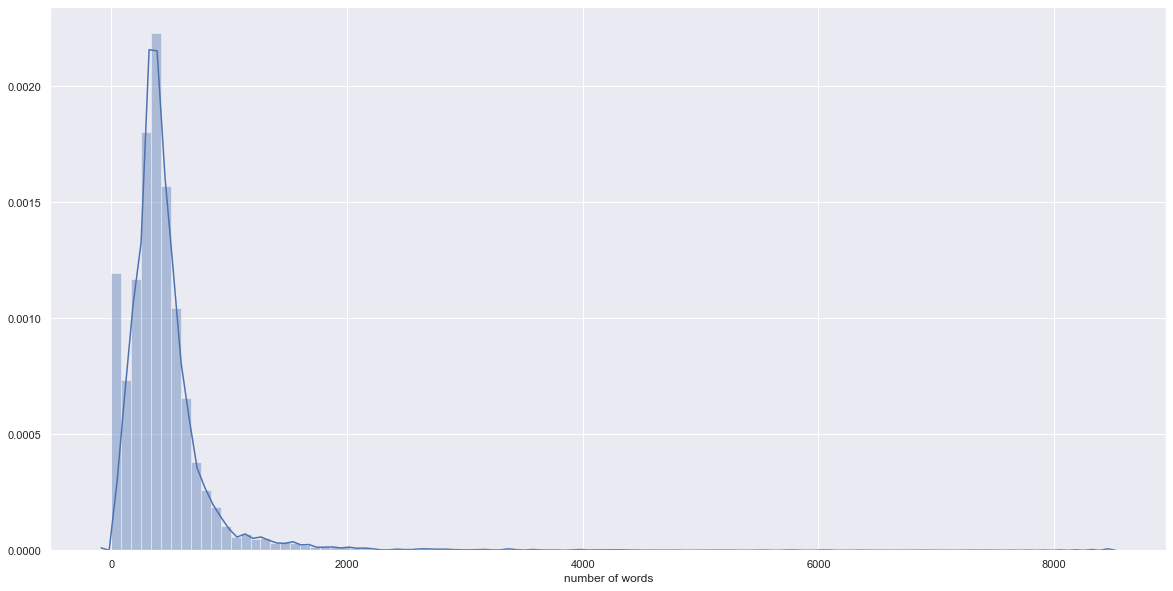

In [20]:
average_word_plot(fake['text'], 100)

Average words :
9.956013389279148


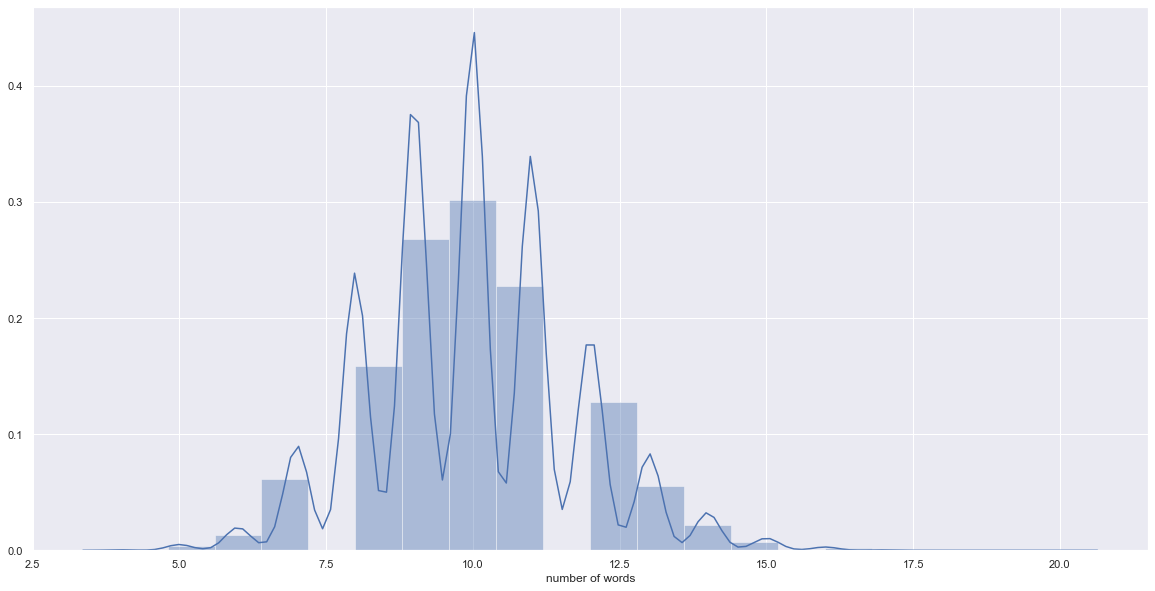

In [21]:
average_word_plot(real['title'], 20)

Average words :
15.118067978533094


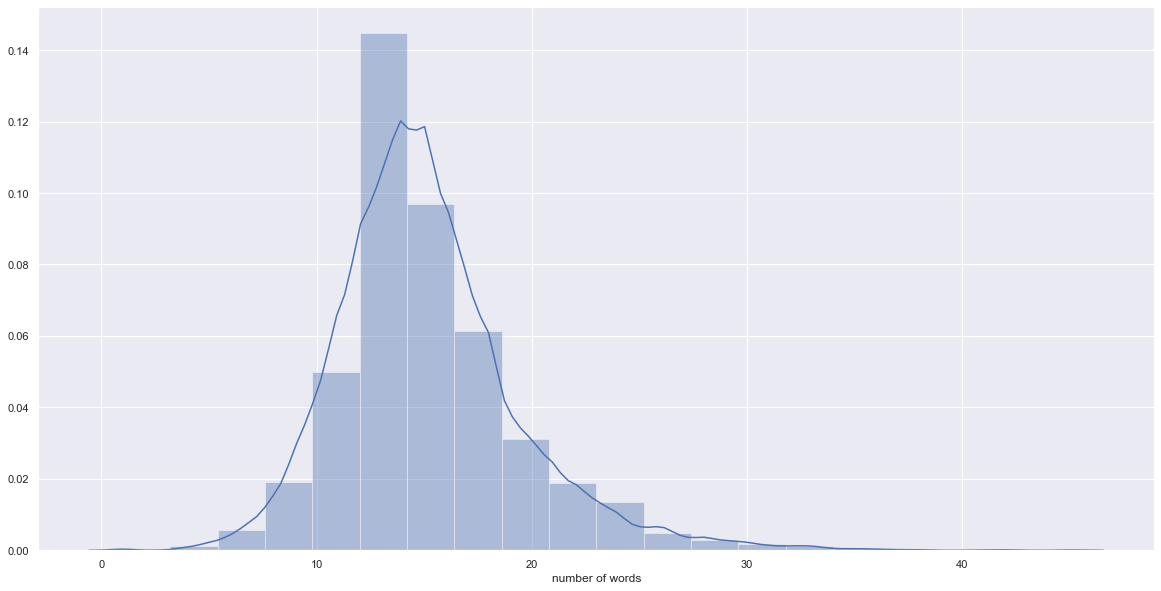

In [22]:
average_word_plot(fake['title'], 20)

## d) stopwords

In [23]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

<span style=" font-family:Times New Roman; font-size:2em;"> Removing stopwords.<span>

In [24]:
stop_words = set(stopwords.words('english'))

real['preprocess_title'] = real['title']
real['preprocess_text'] = real['text']
real['preprocess_subjext'] = real['subject']

fake['preprocess_title'] = fake['title']
fake['preprocess_text'] = fake['text']
fake['preprocess_subjext'] = fake['subject']


real['title'] = real['title'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])
real['text'] = real['text'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])
real['subject'] = real['subject'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])

fake['subject'] = fake['subject'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])
fake['title'] = fake['title'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])
fake['text'] = fake['text'].str.split(' ').apply(lambda x: [item for item in x if item not in stop_words])


<span style=" font-family:Times New Roman; font-size:2em;"> Wordletter for real news.<span>

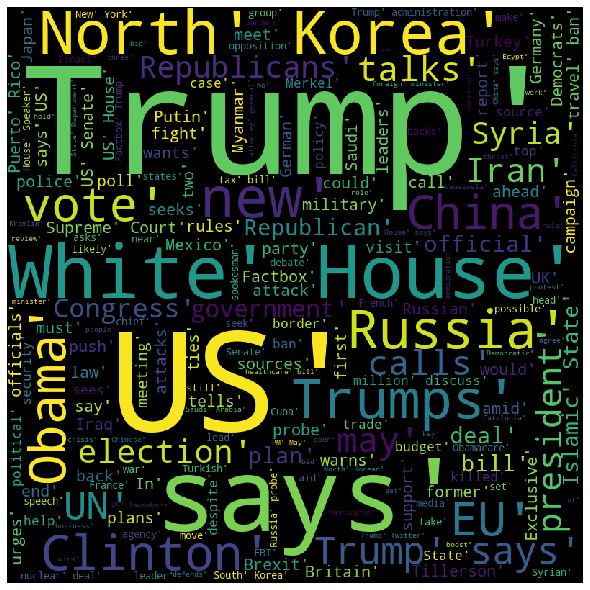

In [25]:
textTxt = ','.join(str(x) for x in real['title'].values)

wordcloudTxt = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(textTxt)
  
                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloudTxt)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

<span style=" font-family:Times New Roman; font-size:2em;"> Wordletter for fake news.<span>

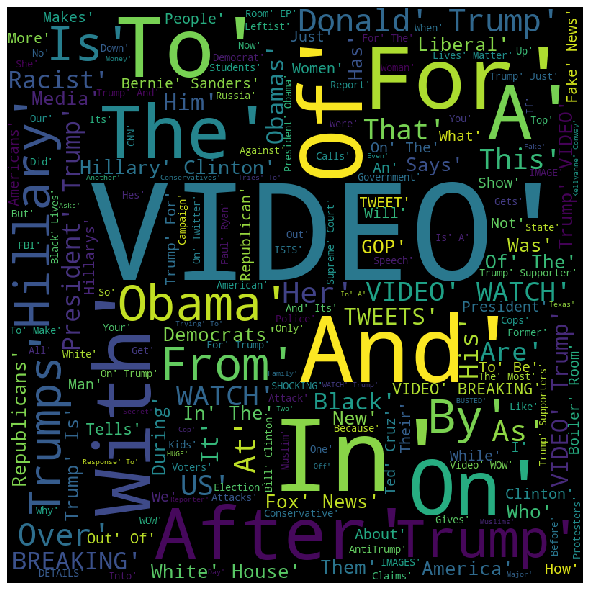

In [26]:
textTxt = ','.join(str(x) for x in fake['title'].values)

wordcloudTxt = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(textTxt)
  
                       
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloudTxt)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Average characters

Average characters :
259.75606996369805


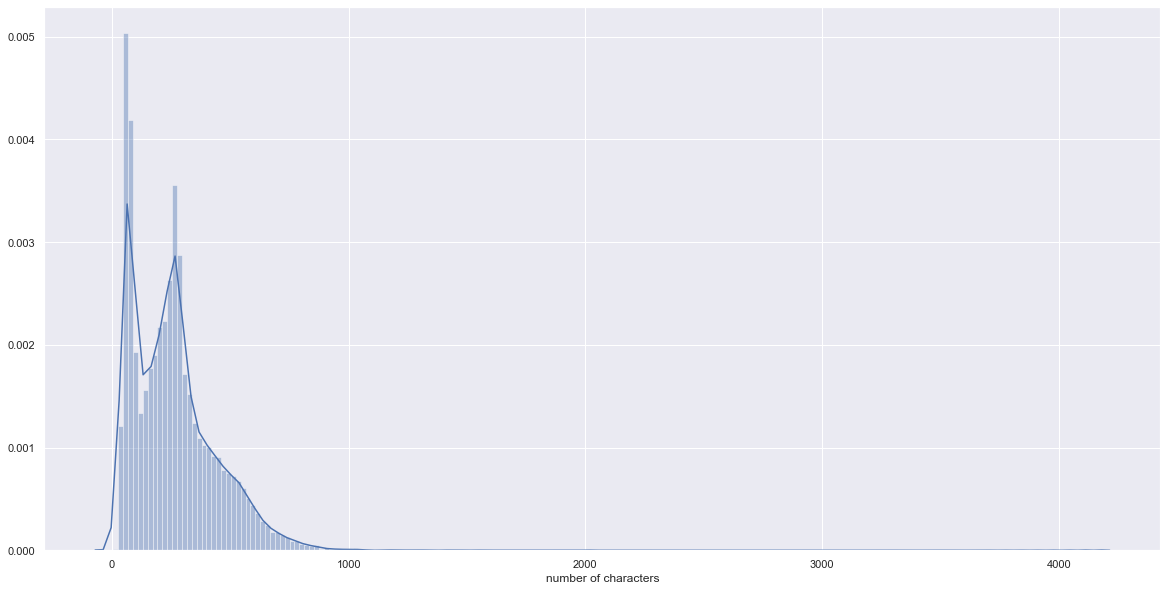

In [27]:
average_characters_plot(real, 1)

Average characters :
276.7628418093534


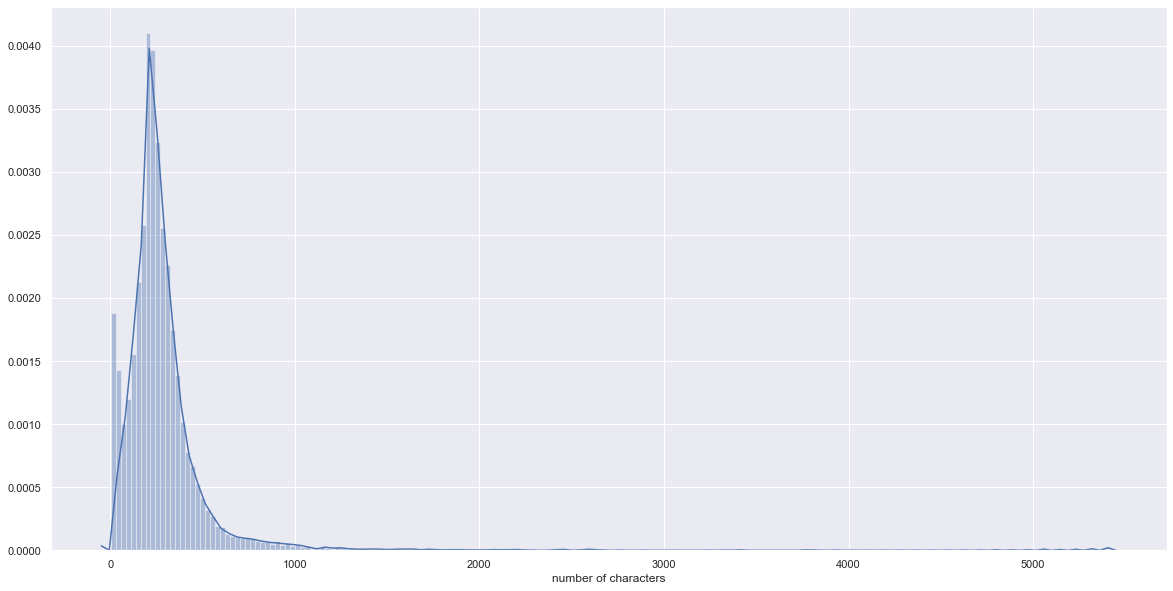

In [28]:
average_characters_plot(fake, 1)

Average characters :
250.63104049785488


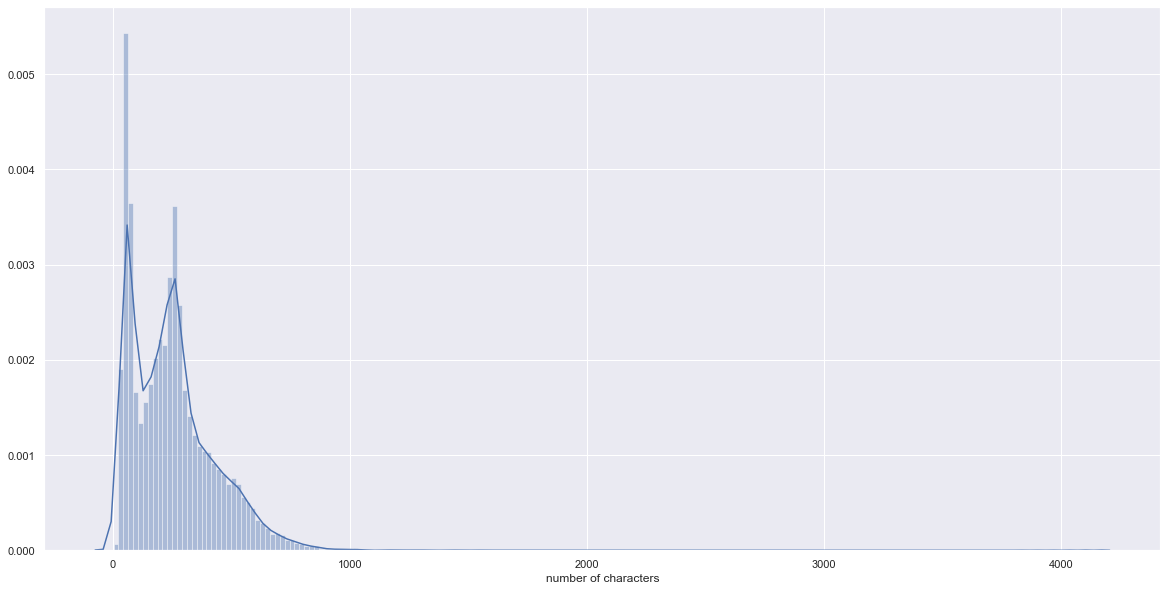

In [29]:
average_characters_plot(real['text'], 0)

Average characters :
261.003663003663


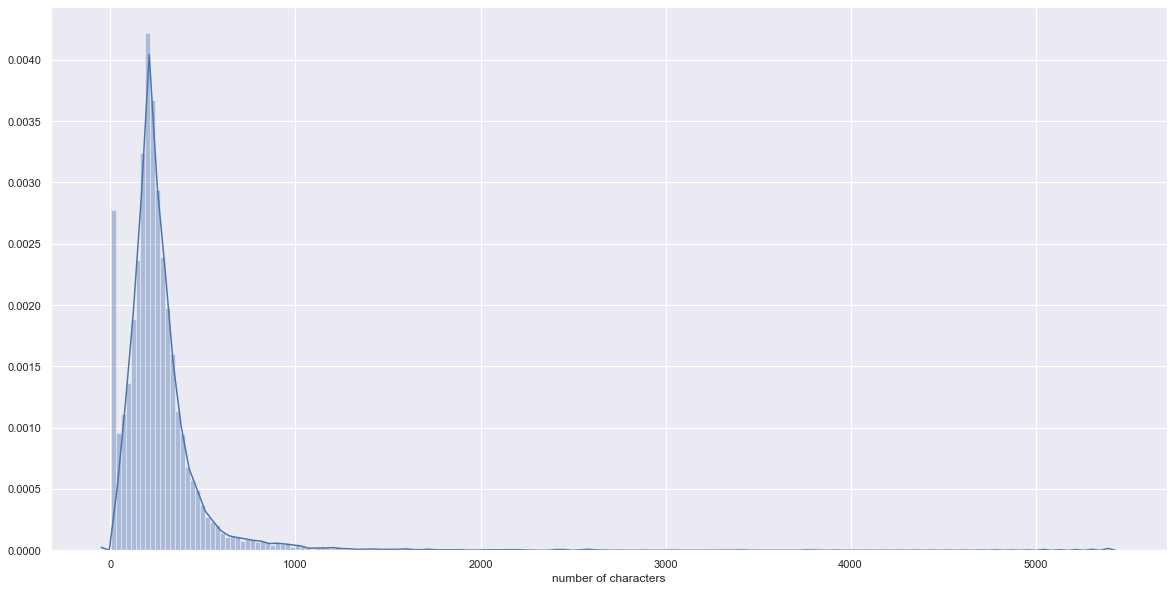

In [30]:
average_characters_plot(fake['text'], 0)

## Average words

Average words :
250.63104049785488


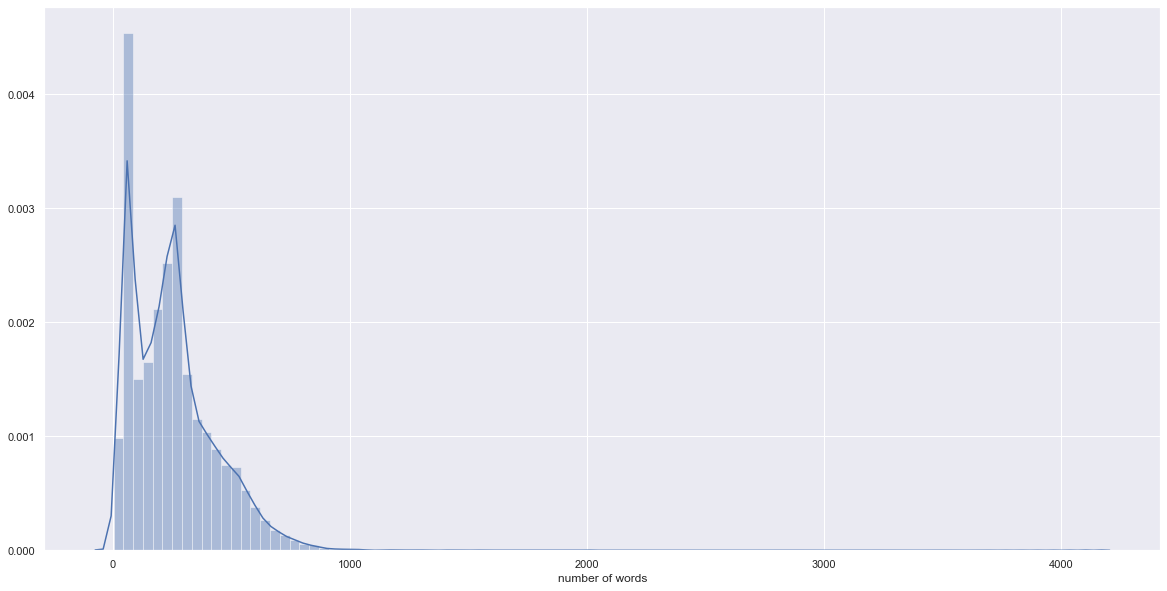

In [31]:
average_word_plot(real['text'], 100)

Average words :
261.003663003663


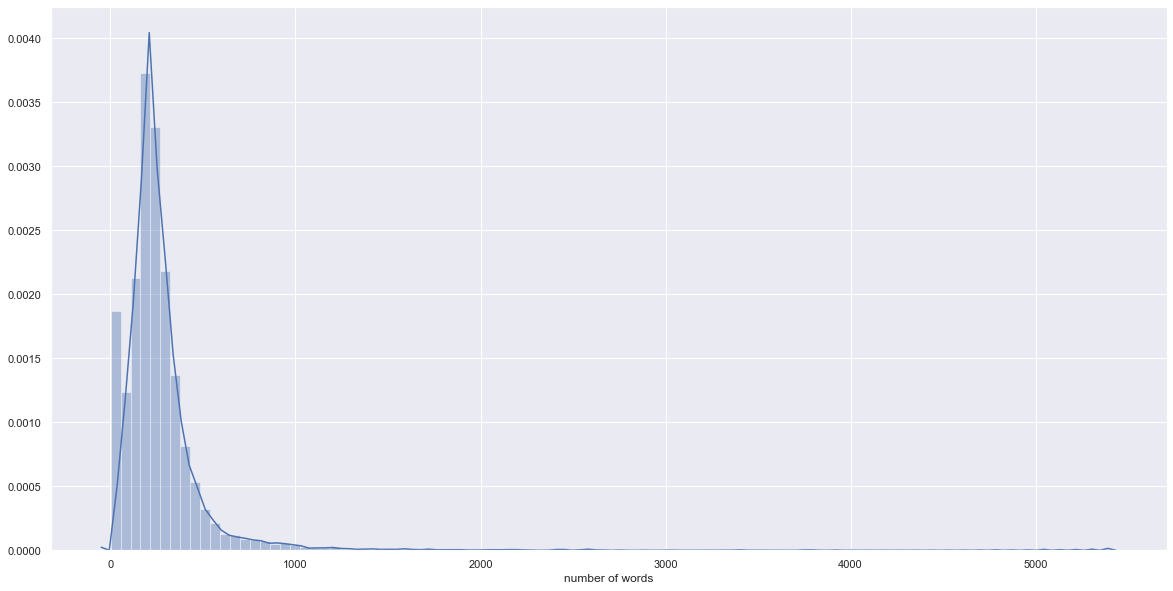

In [32]:
average_word_plot(fake['text'], 100)

Average words :
8.125029465843195


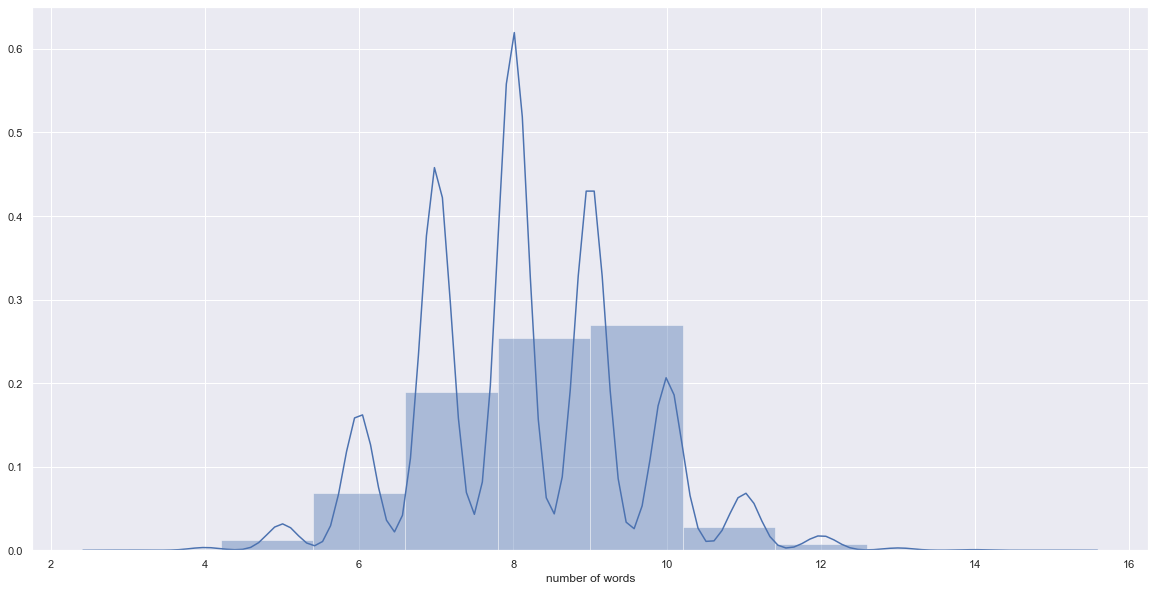

In [33]:
average_word_plot(real['title'], 10)

Average words :
14.692307692307692


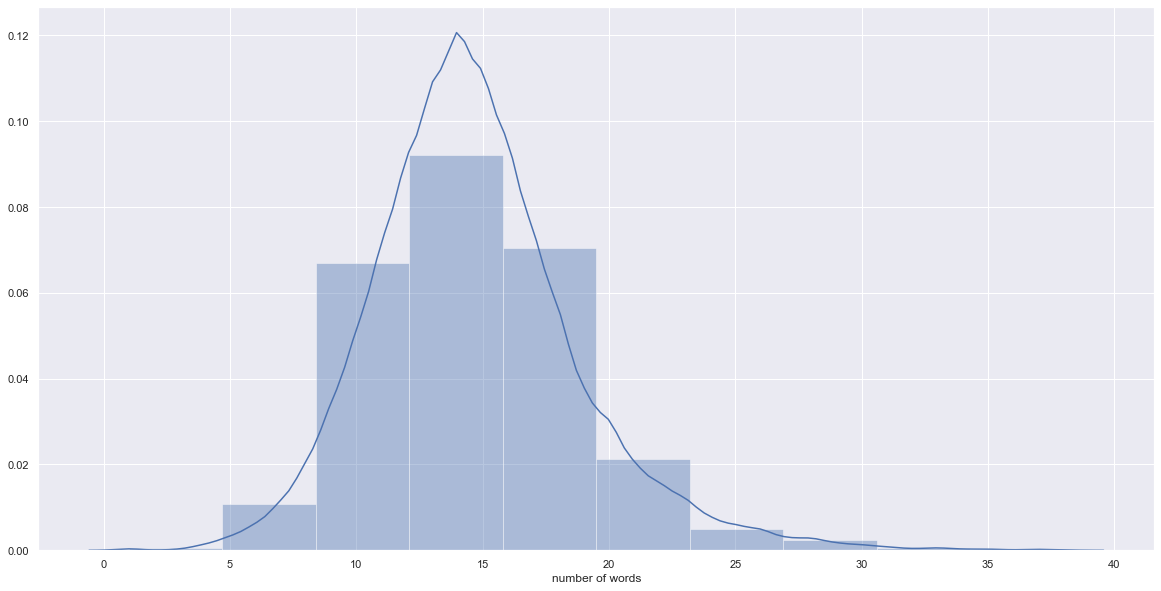

In [34]:
average_word_plot(fake['title'], 10)

## e) bigrams

In [35]:
def return_bigram(df, stop_words):
    token = [token for token in df.split(" ") if token != "" if token not in stop_words]

    tuples = zip(*[token[i:] for i in range(2)])
    
    bigram = [" ".join(x) for x in tuples]
    
    return bigram

In [36]:


for i in range(0, len(real['title'])):
    real['title'].values[i] = ' '.join([str(elem) for elem in real['title'].values[i]])
    
for i in range(0, len(real['text'])):
    real['text'].values[i] = ' '.join([str(elem) for elem in real['text'].values[i]])

for i in range(0, len(real['subject'])):
    real['subject'].values[i] = ' '.join([str(elem) for elem in real['subject'].values[i]])
    
for i in range(0, len(fake['title'])):
    fake['title'].values[i] = ' '.join([str(elem) for elem in fake['title'].values[i]])
    
for i in range(0, len(fake['text'])):
    fake['text'].values[i] = ' '.join([str(elem) for elem in fake['text'].values[i]])

for i in range(0, len(fake['subject'])):
    fake['subject'].values[i] = ' '.join([str(elem) for elem in fake['subject'].values[i]])
    


In [37]:
def print_bigram(temp_df):
    x,y = zip(*temp_df)
    plt.figure(2, figsize=(20,8))
    plt.subplot(1,1,1)
    plt.bar(x,y)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

def top_n_frequent_bigrams(temp_df, n = 0):
    if n == 0:
        return
    
    vector = CountVectorizer(ngram_range=(2,2),lowercase=False).fit(temp_df)
    bow = vector.transform(temp_df)
    total_words = bow.sum(axis=0)
    
    top = [(word, total_words[0, x]) for word, x in vector.vocabulary_.items()]
    top = sorted(top, key=lambda x: x[1], reverse=True)
    
    return top[:n]
    

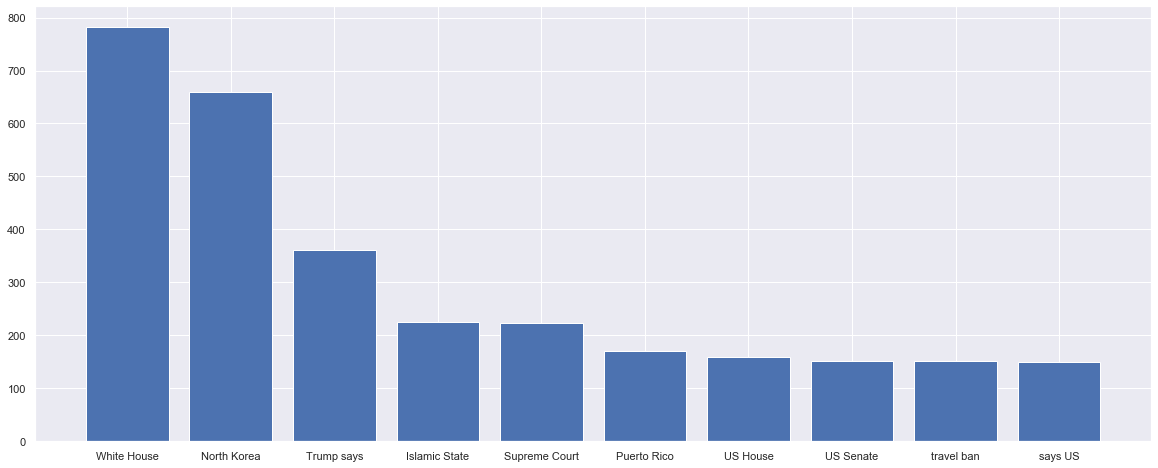

In [39]:
real_title_bigram = top_n_frequent_bigrams(real['title'], 10)
print_bigram(real_title_bigram)

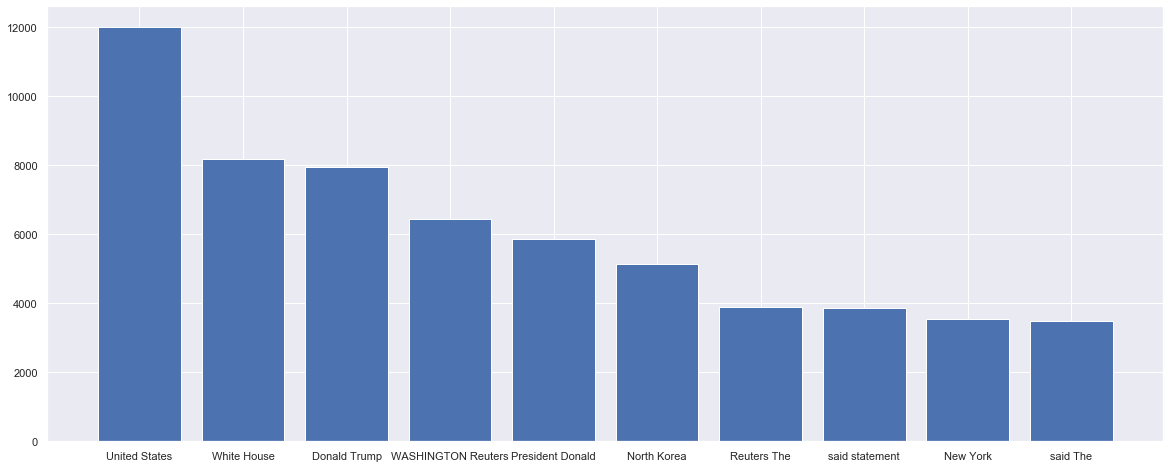

In [40]:
real_text_bigram = top_n_frequent_bigrams(real['text'], 10)
print_bigram(real_text_bigram)

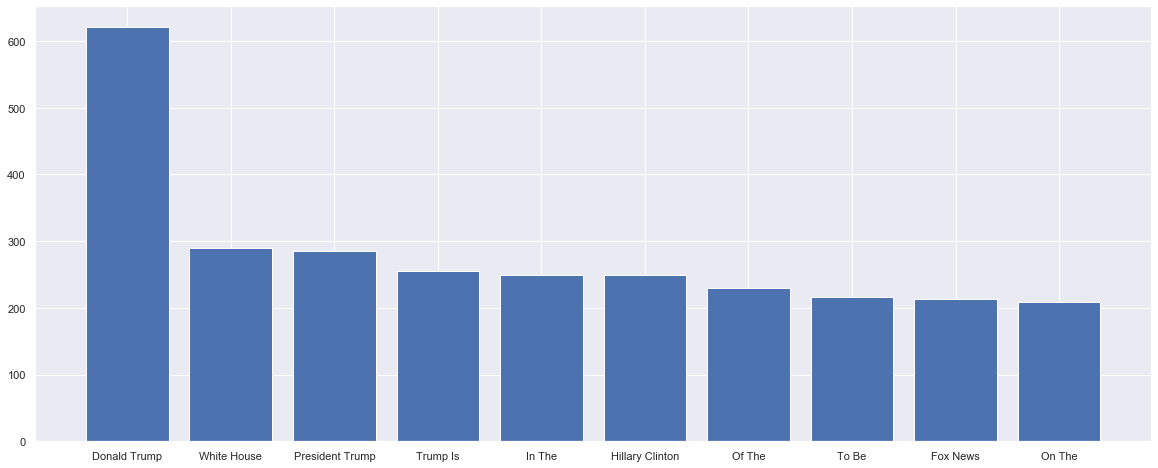

In [41]:
fake_title_bigram = top_n_frequent_bigrams(fake['title'], 10)
print_bigram(fake_title_bigram)

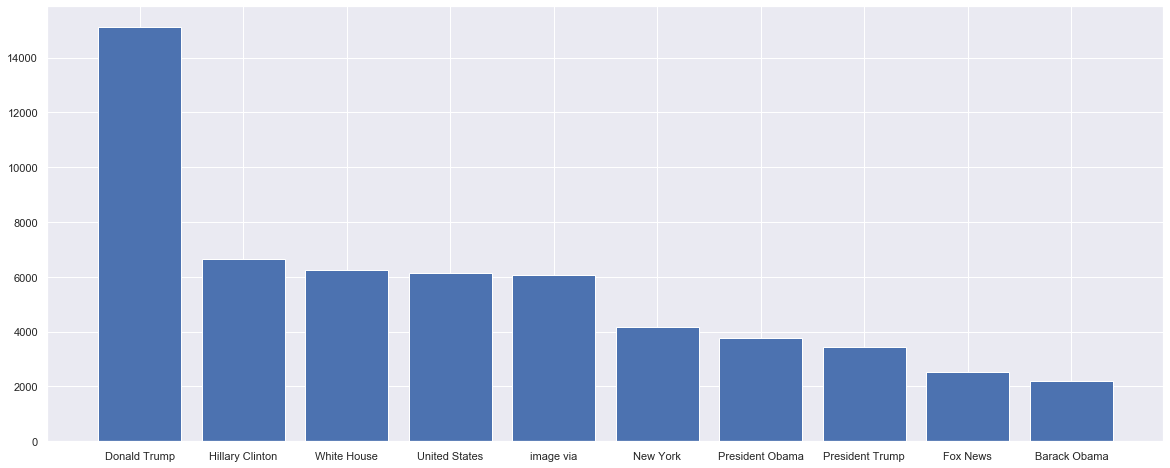

In [42]:
fake_text_bigram = top_n_frequent_bigrams(fake['text'], 10)
print_bigram(fake_text_bigram)

# Part 3 Create train and test set

In [43]:
real['label'] = 1
fake['label'] = 0

In [44]:
tsize = round(len(fake) / 10)

In [45]:
train = real.head(tsize)
train = train.append(fake.head(tsize))

train = train.drop(['preprocess_title','preprocess_text','preprocess_subjext'], axis=1)

In [46]:
train.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2338, 2339, 2340, 2341, 2342, 2343, 2344, 2345, 2346, 2347],
           dtype='int64', length=4696)

In [47]:
train.to_csv('train.csv')

In [49]:

test = real.tail(tsize)
test = test.append(fake.tail(tsize))


test = test.drop(['preprocess_title','preprocess_text','preprocess_subjext'], axis=1)



In [50]:
test.to_csv('test.csv')

# Part 4 Classification

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
#!pip install gensim
#!pip install python-Levenshtein
import gensim as gns

## Create a corpus for train set

<span style=" font-family:Times New Roman; font-size:2em;">In this step we are going to concatinate the text from each column into one column.<span>

In [52]:
corpus = train[train.columns[0:4]].apply(
    lambda x: ','.join(x),
    axis=1
)

corpus.replace(',','', regex=True, inplace=True)


temp = pd.get_dummies(corpus)

In [53]:
tcorpus = test[test.columns[0:4]].apply(
    lambda x: ','.join(x),
    axis=1
)

tcorpus.replace(',','', regex=True, inplace=True)

temp2 = pd.get_dummies(tcorpus)

<span style=" font-family:Times New Roman; font-size:2em;"> Bag of words(X_bow,Y_bow).<span>

In [54]:
vectorizer = CountVectorizer(min_df = 1, max_df = 20)
X_bow = vectorizer.fit_transform(temp)
Y_bow = vectorizer.transform(temp2)

<span style=" font-family:Times New Roman; font-size:2em;">a)i) LogisticRegression with X_bow.<span>

In [55]:
LogReg = LogisticRegression(solver='lbfgs')

In [56]:
LogReg.fit(X_bow,train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_pred = LogReg.predict(Y_bow)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Logistic regression with BoW.<span>

In [58]:
f1_score(test['label'], y_pred)

0.48727099690697123

In [59]:
accuracy_score(test['label'], y_pred)

0.541098807495741

<span style=" font-family:Times New Roman; font-size:2em;">Tf-idf(X_tf,Y_tf)<span>

In [60]:
tfvectorizer = TfidfVectorizer(min_df = 1, max_df = 20)
X_tf = tfvectorizer.fit_transform(temp)
Y_tf = tfvectorizer.transform(temp2)

<span style=" font-family:Times New Roman; font-size:2em;">a)ii) LogisticRegression with tf-idf.<span>

In [61]:
LogReg.fit(X_tf,train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred = LogReg.predict(Y_tf)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Logistic regression with tf-idf.<span>

In [63]:
f1_score(test['label'], y_pred)

0.5276392802948191

In [64]:
accuracy_score(test['label'], y_pred)

0.5359880749574105

<span style=" font-family:Times New Roman; font-size:2em;">b)i) Naive Bayes with BoW.<span>

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
clf = GaussianNB()
clf.fit(X_bow.toarray(), train['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
y_pred = clf.predict(Y_bow.toarray())

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Naive bayes with BoW.<span>

In [68]:
f1_score(test['label'], y_pred)

0.5233564013840831

In [69]:
accuracy_score(test['label'], y_pred)

0.530664395229983

<span style=" font-family:Times New Roman; font-size:2em;">b)ii) Naive Bayes with tf-idf.<span>

In [70]:
clf = GaussianNB()
clf.fit(X_tf.toarray(), train['label'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
y_pred = clf.predict(Y_tf.toarray())

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Naive bayes with tf-idf.<span>

In [72]:
f1_score(test['label'], y_pred)

0.5309508615188258

In [73]:
accuracy_score(test['label'], y_pred)

0.5304514480408858

<span style=" font-family:Times New Roman; font-size:2em;">b)i) SVM with BoW.<span>

In [74]:
from sklearn import svm

regr = svm.SVC()
regr.fit(X_bow, train['label'])


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
y_pred = regr.predict(Y_bow)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for SVM with BoW.<span>

In [76]:
f1_score(test['label'], y_pred)

0.5512224691856941

In [77]:
accuracy_score(test['label'], y_pred)

0.5270442930153322

<span style=" font-family:Times New Roman; font-size:2em;">b)ii) SVM with tf-idf.<span>

In [78]:
from sklearn import svm

regr = svm.SVC()
regr.fit(X_tf, train['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
y_pred = regr.predict(Y_tf)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for SVM with TF-IDF.<span>

In [80]:
f1_score(test['label'], y_pred)

0.5456831517183571

In [81]:
accuracy_score(test['label'], y_pred)

0.5383304940374787

<span style=" font-family:Times New Roman; font-size:2em;">b)i) Random forest with BoW.<span>

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rforest = RandomForestClassifier(max_depth=2, random_state=0)
rforest.fit(X_bow, train['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [84]:
y_pred = regr.predict(Y_bow)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Random forest with BoW.<span>

In [85]:
f1_score(test['label'], y_pred)

0.6676148485279476

In [86]:
accuracy_score(test['label'], y_pred)

0.5023424190800682

<span style=" font-family:Times New Roman; font-size:2em;">b)ii) Random forest with tf-idf.<span>

In [87]:
rforest = RandomForestClassifier(max_depth=2, random_state=0)
rforest.fit(X_tf, train['label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
y_pred = regr.predict(Y_tf)

<span style=" font-family:Times New Roman; font-size:2em;">F1 score and accuracy score for Random forest with tf-idf.<span>

In [89]:
f1_score(test['label'], y_pred)

0.5456831517183571

In [90]:
accuracy_score(test['label'], y_pred)

0.5383304940374787